In [50]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

sub ls -10, cn -9

In [51]:
df = pd.read_csv('C:\\Users\\DHAN RAJ\\Downloads\\btp_forecast_preprocessed_data\\delhi\\hourly\\imputed_hourly_delhi_data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
data = df.drop(columns=['Timestamp'])
# Assuming df is your DataFrame
correlation_matrix = data.corr()
print(correlation_matrix)

                     PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
PM2.5 (µg/m³)             1.000000      0.762668    0.365120     0.394483   
PM10 (µg/m³)              0.762668      1.000000    0.441521     0.441850   
NO (µg/m³)                0.365120      0.441521    1.000000     0.411800   
NO2 (µg/m³)               0.394483      0.441850    0.411800     1.000000   
NOx (ppb)                 0.424769      0.506704    0.936715     0.657088   
NH3 (µg/m³)               0.417735      0.445048    0.427931     0.418320   
SO2 (µg/m³)               0.202105      0.196856    0.146447     0.087885   
CO (mg/m³)                0.285521      0.417577    0.405056     0.221524   
Ozone (µg/m³)            -0.015239     -0.026832   -0.148200    -0.181012   
Benzene (µg/m³)           0.332918      0.416589    0.379373     0.316374   
Toluene (µg/m³)           0.315975      0.432868    0.463146     0.328473   
Eth-Benzene (µg/m³)       0.251269      0.372110    0.377531     0.232003   

In [52]:
# Set correlation threshold
threshold = 0.3

# Find pairs with correlation above threshold
highly_correlated_pairs = [(column1, 'PM2.5 (µg/m³)') for column1 in correlation_matrix.columns if abs(correlation_matrix[column1]['PM2.5 (µg/m³)']) > threshold and column1 != 'PM2.5 (µg/m³)']

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests

# Apply Granger's Causality Test
for pair in highly_correlated_pairs:
    print()
    print(f"Granger Causality Test for pair {pair}:")
    granger_test_result = grangercausalitytests(df[list(pair)], maxlag=12)


Granger Causality Test for pair ('PM10 (µg/m³)', 'PM2.5 (µg/m³)'):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=420.1599, p=0.0000  , df_denom=26276, df_num=1
ssr based chi2 test:   chi2=420.2079, p=0.0000  , df=1
likelihood ratio test: chi2=416.8836, p=0.0000  , df=1
parameter F test:         F=420.1599, p=0.0000  , df_denom=26276, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=198.5528, p=0.0000  , df_denom=26273, df_num=2
ssr based chi2 test:   chi2=397.1812, p=0.0000  , df=2
likelihood ratio test: chi2=394.2095, p=0.0000  , df=2
parameter F test:         F=198.5528, p=0.0000  , df_denom=26273, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=138.4267, p=0.0000  , df_denom=26270, df_num=3
ssr based chi2 test:   chi2=415.3909, p=0.0000  , df=3
likelihood ratio test: chi2=412.1418, p=0.0000  , df=3
parameter F test:         F=138.4267, p=0.0000  , df_denom=26270, df_num=3

Granger Causa

In [54]:
cols = [i[0] for i in highly_correlated_pairs]
cols.append('PM2.5 (µg/m³)')
cols

['PM10 (µg/m³)',
 'NO (µg/m³)',
 'NO2 (µg/m³)',
 'NOx (ppb)',
 'NH3 (µg/m³)',
 'Benzene (µg/m³)',
 'Toluene (µg/m³)',
 'WS (m/s)',
 'PM2.5 (µg/m³)']

In [55]:
df_corr = df[cols]
df_corr.index = df['Timestamp']
from statsmodels.tsa.vector_ar.vecm import coint_johansen
johan_test_temp = df_corr
coint_johansen(johan_test_temp,-1,1).eig

array([0.24502823, 0.16794292, 0.10840943, 0.09335337, 0.0694258 ,
       0.05832703, 0.04816582, 0.03587411, 0.00630898])

In [56]:
colums = [i.split()[0] for i in cols]
val = pd.read_excel("C:/Users/DHAN RAJ/Downloads/delhi_hourly_data_validation.xlsx")
vali = pd.read_excel("C:/Users/DHAN RAJ/Downloads/kolkata_hourly_Jan_1.xlsx")
val['Timestamp'] = pd.to_datetime(vali['Timestamp'])
val.set_index('Timestamp', inplace=True)
val = val[colums]
val.columns = cols
val

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
Timestamp,,,,,,,,,
2024-01-01 00:00:00,353.65,23.25,50.18,37.56,42.58,4.81,8.69,0.46,192.07
2024-01-01 01:00:00,346.30,25.27,33.16,34.79,43.73,4.83,8.73,0.23,170.90
2024-01-01 02:00:00,352.10,30.97,46.68,47.57,42.32,4.99,8.78,0.27,155.45
2024-01-01 03:00:00,325.05,6.83,46.52,22.22,35.75,2.56,3.54,0.45,187.28
2024-01-01 04:00:00,298.98,26.97,48.75,44.48,31.11,3.67,3.04,0.57,127.58
2024-01-01 05:00:00,283.40,24.91,38.06,37.00,29.05,3.96,2.84,0.56,106.60
2024-01-01 06:00:00,268.12,17.94,26.91,24.81,30.56,7.61,10.66,0.72,115.92
2024-01-01 07:00:00,268.10,31.00,31.68,37.40,27.90,7.90,10.85,0.44,120.93
2024-01-01 08:00:00,267.12,26.47,35.80,37.35,26.14,2.80,4.81,0.36,121.00


In [57]:
def df_to_X_y(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [58]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(df_corr, WINDOW_SIZE)
X1.shape, y1.shape

((26279, 1, 1, 9), (26279, 9))

In [59]:
val[cols]= val[cols].fillna(val[cols].rolling(8,min_periods=1).mean())
print(val)
X_test1, y_test1 = df_to_X_y(val, WINDOW_SIZE)

                     PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  NOx (ppb)  \
Timestamp                                                               
2024-01-01 00:00:00        353.65       23.25        50.18      37.56   
2024-01-01 01:00:00        346.30       25.27        33.16      34.79   
2024-01-01 02:00:00        352.10       30.97        46.68      47.57   
2024-01-01 03:00:00        325.05        6.83        46.52      22.22   
2024-01-01 04:00:00        298.98       26.97        48.75      44.48   
2024-01-01 05:00:00        283.40       24.91        38.06      37.00   
2024-01-01 06:00:00        268.12       17.94        26.91      24.81   
2024-01-01 07:00:00        268.10       31.00        31.68      37.40   
2024-01-01 08:00:00        267.12       26.47        35.80      37.35   
2024-01-01 09:00:00        261.00       28.67        46.26      42.27   
2024-01-01 10:00:00        258.38       26.86        40.06      40.59   
2024-01-01 11:00:00        278.03       31.95      

In [60]:
X_train1, y_train1 = X1[:22335], y1[:22335]
X_val1, y_val1 = X1[22335:], y1[22335:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((22335, 1, 1, 9),
 (22335, 9),
 (3944, 1, 1, 9),
 (3944, 9),
 (23, 1, 1, 9),
 (23, 9))

In [66]:
def df_to_X_y2(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][8]
    y.append(label)
  return np.array(X), np.array(y)

In [67]:
X2, y2 = df_to_X_y2(df_corr)
X2.shape, y2.shape

((26279, 1, 9), (26279,))

In [68]:
X2_train, y2_train = X2[:22335], y2[:22335]
X2_val, y2_val = X2[22335:], y2[22335:]
X2_test, y2_test = df_to_X_y2(val)
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((22335, 1, 9), (22335,), (3944, 1, 9), (3944,), (23, 1, 9), (23,))

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
model4 = Sequential()
model4.add(InputLayer((1, 9)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,473 (76.07 KB)

 Trainable params: 19,473 (76.07 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
cp4 = ModelCheckpoint('checkpoint.model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [71]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=200, callbacks=[cp4])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13533.0596 - mean_absolute_error: 88.5327 - val_loss: 20622.4961 - val_mean_absolute_error: 106.2746
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11296.9160 - mean_absolute_error: 76.0865 - val_loss: 17824.2715 - val_mean_absolute_error: 93.6287
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9615.7598 - mean_absolute_error: 65.8145 - val_loss: 15487.8350 - val_mean_absolute_error: 84.4803
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8116.1655 - mean_absolute_error: 58.5385 - val_loss: 13235.4600 - val_mean_absolute_error: 77.4753
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6589.9653 - mean_absolute_error: 52.0033 - val_loss: 11391.7588 - val_mean_absolute_error: 72.0865
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5683.5366 - mean_absolute_error: 47.6851 - val_loss: 9839.7471 - val_mean_absolute_error: 66.8907
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━━━

In [72]:
val

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
Timestamp,,,,,,,,,
2024-01-01 00:00:00,353.65,23.25,50.18,37.56,42.58,4.81,8.69,0.46,192.07
2024-01-01 01:00:00,346.30,25.27,33.16,34.79,43.73,4.83,8.73,0.23,170.90
2024-01-01 02:00:00,352.10,30.97,46.68,47.57,42.32,4.99,8.78,0.27,155.45
2024-01-01 03:00:00,325.05,6.83,46.52,22.22,35.75,2.56,3.54,0.45,187.28
2024-01-01 04:00:00,298.98,26.97,48.75,44.48,31.11,3.67,3.04,0.57,127.58
2024-01-01 05:00:00,283.40,24.91,38.06,37.00,29.05,3.96,2.84,0.56,106.60
2024-01-01 06:00:00,268.12,17.94,26.91,24.81,30.56,7.61,10.66,0.72,115.92
2024-01-01 07:00:00,268.10,31.00,31.68,37.40,27.90,7.90,10.85,0.44,120.93
2024-01-01 08:00:00,267.12,26.47,35.80,37.35,26.14,2.80,4.81,0.36,121.00


In [73]:
df_corr.tail()

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
Timestamp,,,,,,,,,
2023-12-31 19:00:00,524.750000,31.605000,39.7850,40.980000,42.767500,8.7250,15.050000,0.5275,256.925
2023-12-31 20:00:00,507.250000,21.990000,58.2000,42.840000,42.430000,8.9375,15.080000,0.4650,248.325
2023-12-31 21:00:00,461.450000,21.757500,45.1925,37.575000,44.480000,15.2400,17.815000,0.3525,224.275
2023-12-31 22:00:00,432.250000,18.345000,45.8050,33.862500,45.407500,21.3800,26.100000,0.6425,218.775
2023-12-31 23:00:00,389.633333,44.383333,51.6500,61.746667,44.993333,24.3400,29.783333,0.4200,185.400


In [75]:
x_test_start = df_corr.values[-1]
x_test_start = np.reshape(x_test_start,(1,1,9))
x_test_start

array([[[389.6333333 ,  44.38333333,  51.65      ,  61.74666667,
          44.99333333,  24.34      ,  29.78333333,   0.42      ,
         185.4       ]]])

In [76]:
y_test_start = val.values[0,-1]
y_test = []
y_test.append(y_test_start)
for i in list(y2_test):
    y_test.append(i)
y_test = np.array(y_test)
y_test

array([192.07, 170.9 , 155.45, 187.28, 127.58, 106.6 , 115.92, 120.93,
       121.  , 137.78, 120.2 , 116.8 , 151.4 , 188.65, 193.  , 138.45,
       160.57, 137.78, 143.1 , 169.58, 226.7 , 231.2 , 224.12, 204.1 ])

[[[3.89633333e+02 4.43833333e+01 5.16500000e+01 6.17466667e+01
   4.49933333e+01 2.43400000e+01 2.97833333e+01 4.20000000e-01
   1.85400000e+02]]

 [[3.53650000e+02 2.32500000e+01 5.01800000e+01 3.75600000e+01
   4.25800000e+01 4.81000000e+00 8.69000000e+00 4.60000000e-01
   1.92070000e+02]]

 [[3.46300000e+02 2.52700000e+01 3.31600000e+01 3.47900000e+01
   4.37300000e+01 4.83000000e+00 8.73000000e+00 2.30000000e-01
   1.70900000e+02]]

 [[3.52100000e+02 3.09700000e+01 4.66800000e+01 4.75700000e+01
   4.23200000e+01 4.99000000e+00 8.78000000e+00 2.70000000e-01
   1.55450000e+02]]

 [[3.25050000e+02 6.83000000e+00 4.65200000e+01 2.22200000e+01
   3.57500000e+01 2.56000000e+00 3.54000000e+00 4.50000000e-01
   1.87280000e+02]]

 [[2.98980000e+02 2.69700000e+01 4.87500000e+01 4.44800000e+01
   3.11100000e+01 3.67000000e+00 3.04000000e+00 5.70000000e-01
   1.27580000e+02]]

 [[2.83400000e+02 2.49100000e+01 3.80600000e+01 3.70000000e+01
   2.90500000e+01 3.96000000e+00 2.84000000e+00 5.60000

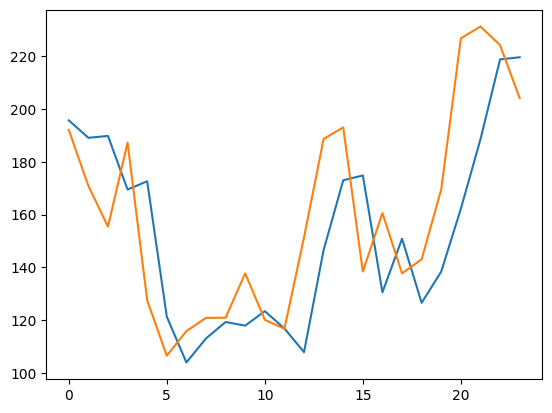

In [77]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mae(y, predictions)
X_test = np.vstack((x_test_start, X2_test))
print(X_test)
df_4, mae_4 = plot_predictions1(model4, X_test, y_test)

In [78]:
df_4

,Predictions,Actuals
0,195.680328,192.07
1,189.076508,170.90
2,189.769440,155.45
3,169.491882,187.28
4,172.619232,127.58
5,121.386673,106.60
6,104.050980,115.92
7,113.146767,120.93
8,119.369873,121.00
9,117.985977,137.78


In [79]:
mae_4

22.44541187286377

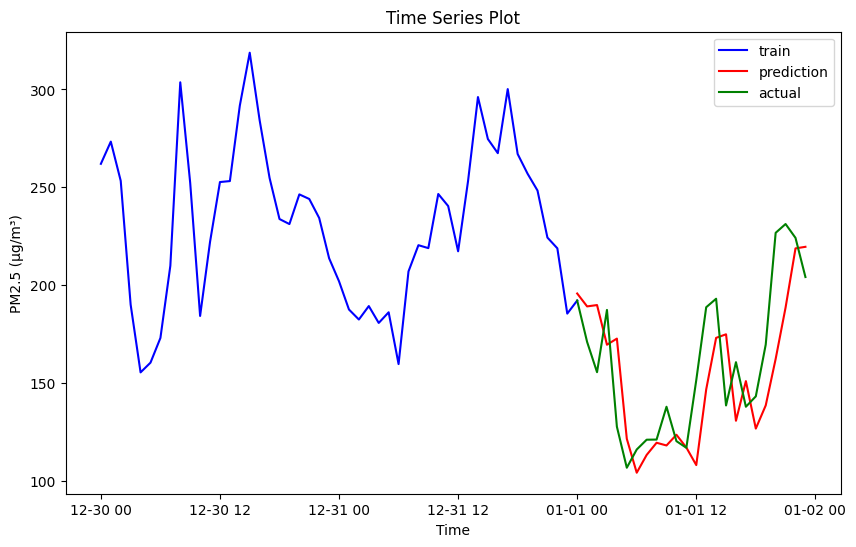

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df_4.index = val.index
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_4['Predictions']])
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], val['PM2.5 (µg/m³)']])

df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()


In [81]:
def df_to_X_y3(df, window_size=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [82]:
X3, y3 = df_to_X_y3(df_corr)
X3.shape, y3.shape

((26279, 1, 9), (26279, 9))

In [83]:
X3_train, y3_train = X3[:22335], y3[:22335]
X3_val, y3_val = X3[22335:], y3[22335:]
X3_test, y3_test = df_to_X_y3(val)
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((22335, 1, 9), (22335, 9), (3944, 1, 9), (3944, 9), (23, 1, 9), (23, 9))

In [84]:
model5 = Sequential()
model5.add(InputLayer((1, 9)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(9, 'linear'))

model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 64)                  │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,545 (76.35 KB)

 Trainable params: 19,545 (76.35 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
cp5 = ModelCheckpoint('checkpoint.model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [86]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=200, callbacks=[cp5])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12038.1055 - mean_absolute_error: 57.8275 - val_loss: 14436.6719 - val_mean_absolute_error: 60.2449
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11506.8799 - mean_absolute_error: 55.6191 - val_loss: 13609.6797 - val_mean_absolute_error: 56.6981
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10733.9521 - mean_absolute_error: 51.6673 - val_loss: 12715.6025 - val_mean_absolute_error: 52.6267
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10151.0254 - mean_absolute_error: 48.2727 - val_loss: 11776.5830 - val_mean_absolute_error: 48.3694
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9093.5117 - mean_absolute_error: 44.6576 - val_loss: 10885.4600 - val_mean_absolute_error: 44.6575
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8475.7285 - mean_absolute_error: 42.4422 - val_loss: 10043.4600 - val_mean_absolute_error: 41.9368
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━

In [88]:
def mae(true, pred):
    return np.mean(np.abs(true - pred))

def plot_predictions2(model, X, y, cols, start=0, end=100):
    predictions = model.predict(X)
    df = pd.DataFrame(data=predictions)
    df.columns=cols
    org = pd.DataFrame(data=y)
    org.columns = cols
    plt.plot(df['PM2.5 (µg/m³)'][start:end])
    plt.plot(org['PM2.5 (µg/m³)'][start:end])
    a = org.astype('float32')
    print(predictions[:,-1].dtype)
    ma = mae(a['PM2.5 (µg/m³)'],df['PM2.5 (µg/m³)'])
    return df[start:end], org, ma
x_test_start = df_corr.values[-1]
x_test_start = np.reshape(x_test_start,(1,1,9))
y_test_start = val.values[0]
x_test_9 = np.vstack((x_test_start, X2_test))
print(x_test_9.shape)
y_test_9 = np.vstack((y_test_start, y3_test))
print(y_test_9.shape)

(24, 1, 9)
(24, 9)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
float32
mean absolute error:  22.322912


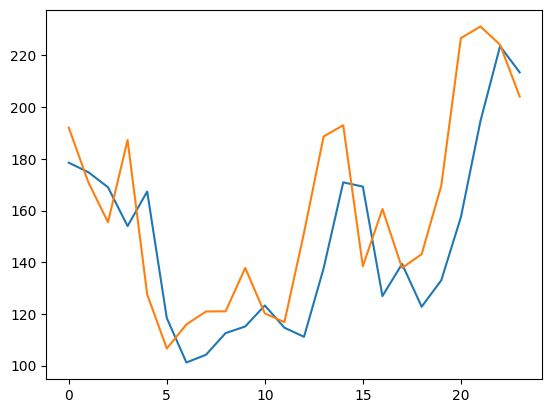

In [89]:
df_5, org_5, mae_5 = plot_predictions2(model5, x_test_9, y_test_9,cols)
print("mean absolute error: ",mae_5)

In [90]:
df_5

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
0,380.445282,31.473562,54.420662,52.240437,36.921177,5.784596,16.828701,0.550078,178.493225
1,334.288147,15.222361,54.124603,37.322727,37.854141,1.854918,2.558192,0.552379,174.827484
2,336.900360,18.556761,40.163605,33.344887,38.864536,2.510139,7.928009,0.565467,169.001617
3,347.160919,26.547964,52.917580,46.270889,35.653595,2.332480,7.742995,0.579673,153.981171
4,301.540680,1.353217,48.350433,22.787905,32.203663,0.548927,-3.544633,0.560993,167.345367
5,288.917511,22.495846,51.401871,42.260868,26.158474,0.223236,0.066438,0.661591,118.405800
6,276.687592,20.211473,42.296745,36.000332,24.272688,0.215494,1.934877,0.699860,101.206917
7,255.331116,15.164573,28.216908,25.519159,27.182491,1.536620,5.931537,0.719687,104.193199
8,265.647888,23.348257,34.522400,35.342155,23.703897,1.165604,4.102540,0.697510,112.571266
9,267.563171,22.534327,39.763084,36.813313,22.465694,0.168362,0.302681,0.674669,115.133186


In [91]:
org_5

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
0,353.65,23.25,50.18,37.56,42.58,4.81,8.69,0.46,192.07
1,346.30,25.27,33.16,34.79,43.73,4.83,8.73,0.23,170.90
2,352.10,30.97,46.68,47.57,42.32,4.99,8.78,0.27,155.45
3,325.05,6.83,46.52,22.22,35.75,2.56,3.54,0.45,187.28
4,298.98,26.97,48.75,44.48,31.11,3.67,3.04,0.57,127.58
5,283.40,24.91,38.06,37.00,29.05,3.96,2.84,0.56,106.60
6,268.12,17.94,26.91,24.81,30.56,7.61,10.66,0.72,115.92
7,268.10,31.00,31.68,37.40,27.90,7.90,10.85,0.44,120.93
8,267.12,26.47,35.80,37.35,26.14,2.80,4.81,0.36,121.00
9,261.00,28.67,46.26,42.27,24.02,1.28,2.76,0.55,137.78


In [92]:
mae_5

22.322912

In [93]:
df_5.index = val.index

In [94]:
df_5

,PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),Benzene (µg/m³),Toluene (µg/m³),WS (m/s),PM2.5 (µg/m³)
Timestamp,,,,,,,,,
2024-01-01 00:00:00,380.445282,31.473562,54.420662,52.240437,36.921177,5.784596,16.828701,0.550078,178.493225
2024-01-01 01:00:00,334.288147,15.222361,54.124603,37.322727,37.854141,1.854918,2.558192,0.552379,174.827484
2024-01-01 02:00:00,336.900360,18.556761,40.163605,33.344887,38.864536,2.510139,7.928009,0.565467,169.001617
2024-01-01 03:00:00,347.160919,26.547964,52.917580,46.270889,35.653595,2.332480,7.742995,0.579673,153.981171
2024-01-01 04:00:00,301.540680,1.353217,48.350433,22.787905,32.203663,0.548927,-3.544633,0.560993,167.345367
2024-01-01 05:00:00,288.917511,22.495846,51.401871,42.260868,26.158474,0.223236,0.066438,0.661591,118.405800
2024-01-01 06:00:00,276.687592,20.211473,42.296745,36.000332,24.272688,0.215494,1.934877,0.699860,101.206917
2024-01-01 07:00:00,255.331116,15.164573,28.216908,25.519159,27.182491,1.536620,5.931537,0.719687,104.193199
2024-01-01 08:00:00,265.647888,23.348257,34.522400,35.342155,23.703897,1.165604,4.102540,0.697510,112.571266


In [95]:
df

Timestamp
2021-01-01 00:00:00    182.670000
2021-01-01 01:00:00    172.260000
2021-01-01 02:00:00    168.350000
2021-01-01 03:00:00    178.900000
2021-01-01 04:00:00    175.545000
                          ...    
2024-01-01 19:00:00    138.473724
2024-01-01 20:00:00    162.233978
2024-01-01 21:00:00    188.510635
2024-01-01 22:00:00    218.744751
2024-01-01 23:00:00    219.547226
Length: 26304, dtype: float64

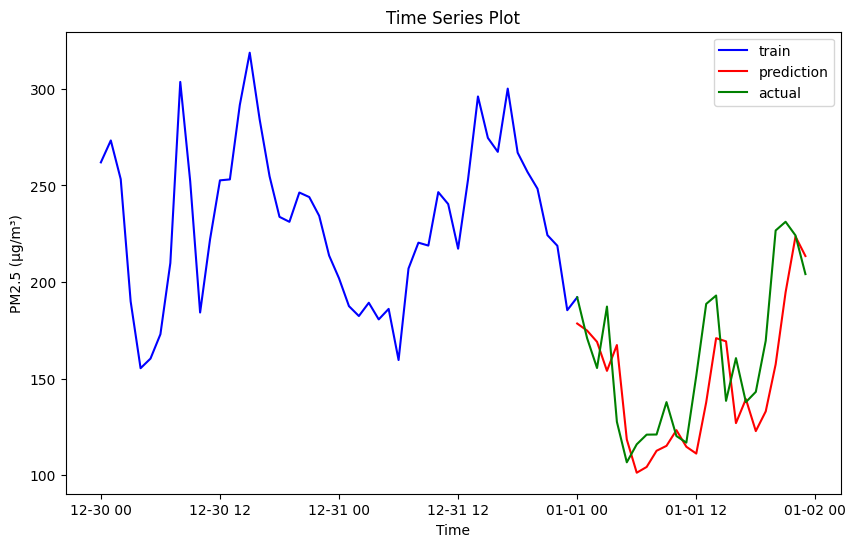

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_5['PM2.5 (µg/m³)']])
org_5.index = val.index
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], org_5['PM2.5 (µg/m³)']])
df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()


In [102]:
model6 = Sequential()
model6.add(InputLayer((1, 9)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(9, 'linear'))

model6.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 1, 32)               │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,809 (120.35 KB)

 Trainable params: 30,809 (120.35 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
cp6 = ModelCheckpoint('checkpoints.model6.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [104]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=200, callbacks=[cp6])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 12064.5283 - mean_absolute_error: 57.7130 - val_loss: 13992.6846 - val_mean_absolute_error: 58.0727
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11113.0371 - mean_absolute_error: 53.5421 - val_loss: 12433.6377 - val_mean_absolute_error: 52.1660
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9680.5342 - mean_absolute_error: 48.9885 - val_loss: 11048.8213 - val_mean_absolute_error: 47.3561
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8475.0107 - mean_absolute_error: 45.4575 - val_loss: 9804.4336 - val_mean_absolute_error: 43.4279
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7398.4995 - mean_absolute_error: 41.8927 - val_loss: 8693.3730 - val_mean_absolute_error: 40.3844
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6585.2368 - mean_absolute_error: 39.7091 - val_loss: 7738.1367 - val_mean_absolute_error: 38.2159
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 

In [105]:
model7 = Sequential()
model7.add(InputLayer((1, 9)))
model7.add(Conv1D(64, kernel_size=1, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(9, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('checkpoints.model7.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError()])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 64)               │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 9)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,241 (4.85 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=200, callbacks=[cp7])

Epoch 1/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12294.0361 - mean_absolute_error: 62.5682 - val_loss: 10069.3516 - val_mean_absolute_error: 49.3480
Epoch 2/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7173.5264 - mean_absolute_error: 43.8036 - val_loss: 4033.5647 - val_mean_absolute_error: 34.7029
Epoch 3/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2795.4617 - mean_absolute_error: 28.6468 - val_loss: 981.2924 - val_mean_absolute_error: 17.1985
Epoch 4/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1228.3721 - mean_absolute_error: 18.3244 - val_loss: 937.1877 - val_mean_absolute_error: 17.1375
Epoch 5/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1172.4471 - mean_absolute_error: 17.8743 - val_loss: 902.0709 - val_mean_absolute_error: 16.5423
Epoch 6/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1106.6718 - mean_absolute_error: 17.3537 - val_loss: 889.4706 - val_mean_absolute_error: 16.3264
Epoch 7/200
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
float32


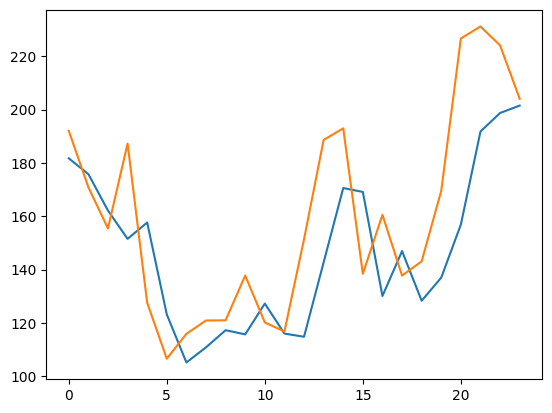

In [107]:
df_7, org_7, mae_7 = plot_predictions2(model7, x_test_9, y_test_9,cols)

In [108]:
mae_7

21.603441

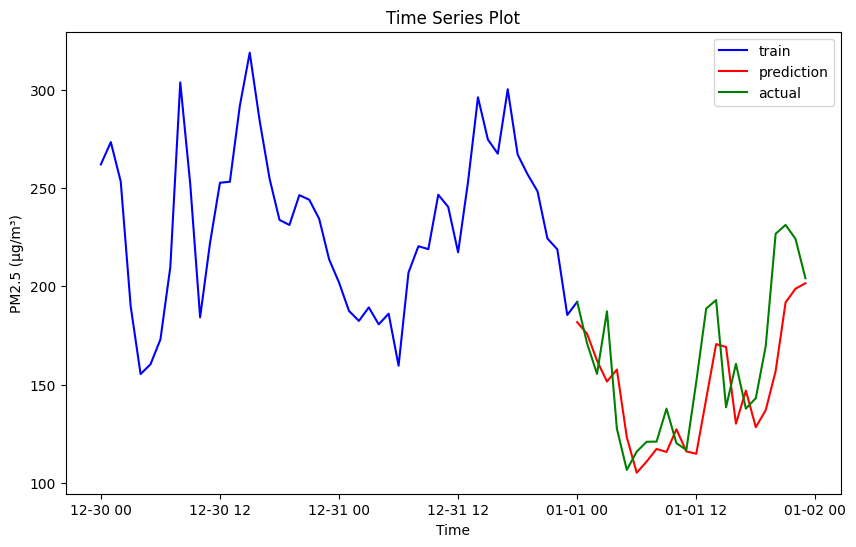

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your dataframes and 'time' is the time column
# Also assuming that 'value' is the column you want to plot

# Join the dataframes
df_7.index = val.index
df = pd.concat([df_corr['PM2.5 (µg/m³)'], df_7['PM2.5 (µg/m³)']])
org_7.index = val.index
df_org = pd.concat([df_corr['PM2.5 (µg/m³)'], org_7['PM2.5 (µg/m³)']])
df.columns = 'PM2.5 (µg/m³)'
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_org.index[-72:len(df_corr['PM2.5 (µg/m³)'])+1], df_org[-72:len(df_corr['PM2.5 (µg/m³)'])+1], color='blue', label='train')
plt.plot(df.index[len(df_corr['PM2.5 (µg/m³)']):], df[len(df_corr['PM2.5 (µg/m³)']):], color='red', label='prediction')
plt.plot(df_org.index[len(df_corr['PM2.5 (µg/m³)']):],df_org[len(df_corr['PM2.5 (µg/m³)']):],color='green',label='actual')
plt.xlabel('Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('Time Series Plot')
plt.legend()
plt.show()